# NHS Hospital Bed Availability by Population Change
### ALL DATA COMES FROM GOVERNMENT SOURCES
Hospital bed data: https://www.england.nhs.uk/statistics/statistical-work-areas/bed-availability-and-occupancy/bed-availability-and-occupancy-kh03/

There are two datasets:

1. Beds-Timeseries-2010-11-onwards
2. Beds Time Series – 1987-88 to 2009-10

For #2, Q4 data was taken as the year data as #1 is annual and not quarterly. #1 & #2 were combined in Excel.

UK population data: https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/timeseries/ukpop/pop
Immigration data:
https://commonslibrary.parliament.uk/research-briefings/sn06077/


In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('fivethirtyeight')

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
data = pd.read_csv('data.csv')
data

,year,total_beds,population,non_eu_immigration
0,1991-92,"242,677",57438700.0,167000
1,1992-93,"232,201",57584500.0,131000
2,1993-94,"219,476",57713900.0,135000
3,1994-95,"211,812",57862100.0,156000
4,1995-96,"206,136",58024800.0,167000
5,1996-97,"198,848",58164400.0,152000
6,1997-98,"193,625",58314200.0,166000
7,1998-99,"190,006",58474900.0,206000
8,1999-00,"186,290",58684400.0,272000
9,2000-01,"186,091",58886100.0,316000


In [129]:
# Ensure correct data types for analysis
data['total_beds'] = data['total_beds'].apply(lambda x: float(x.replace(',', '')))
data['population'] = data['population'].apply(float)
data['non_eu_immigration'] = data['non_eu_immigration'].apply(float)

In [130]:
# Calculate cumulative non-EU immigration
data['cum_non_eu_immigration'] = data['non_eu_immigration'].cumsum()

In [131]:
# Clean year and convert to dt
data['year'] = data['year'].apply(lambda x: datetime.strptime(x.split('-')[0], '%Y'))

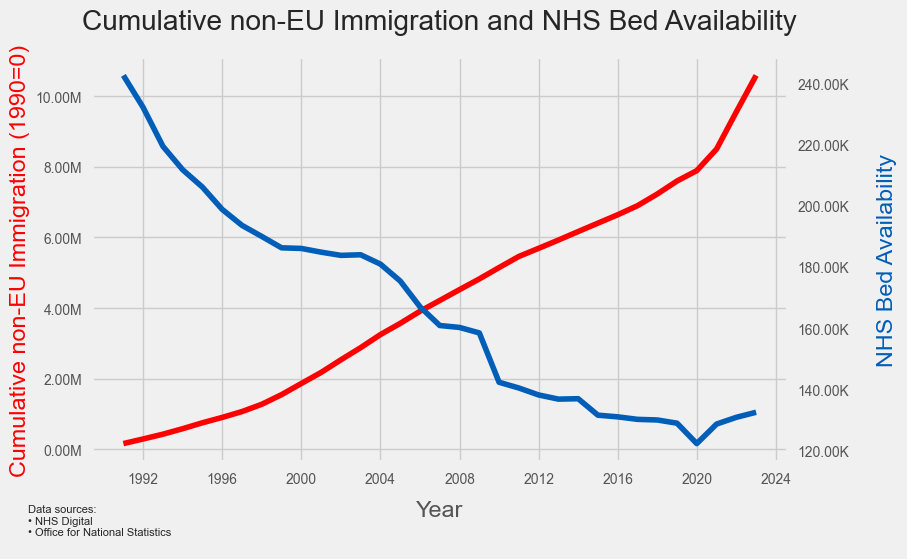

In [132]:
fig, ax = plt.subplots(figsize=(8, 5),)
p1 = sns.lineplot(data, x='year', y='cum_non_eu_immigration', ax=ax, color='red')

ax1 = ax.twinx()
p2 = sns.lineplot(data, x='year', y='total_beds', ax=ax1, color='#005EB8')
ax1.grid(False)

ylabels = ['{:,.2f}'.format(x) + 'M' for x in p1.get_yticks()/1000000]
p1.set_yticklabels(ylabels)
p1.set_ylabel('Cumulative non-EU Immigration (1990=0)')
p1.yaxis.label.set_color('red')

ylabels = ['{:,.2f}'.format(x) + 'K' for x in p2.get_yticks()/1000]
p2.set_yticklabels(ylabels)
p2.set_ylabel('NHS Bed Availability', labelpad=20)
p2.yaxis.label.set_color('#005EB8')

p1.set_xlabel('Year', labelpad=10)

p1.set_title('Cumulative non-EU Immigration and NHS Bed Availability', pad=20)


plt.figtext(0., -0.1, 'Data sources:\n• NHS Digital\n• Office for National Statistics\n', ha='left', fontsize=8, bbox={'alpha':0., 'pad':5})

plt.savefig('fig.png', dpi=300, bbox_inches='tight')

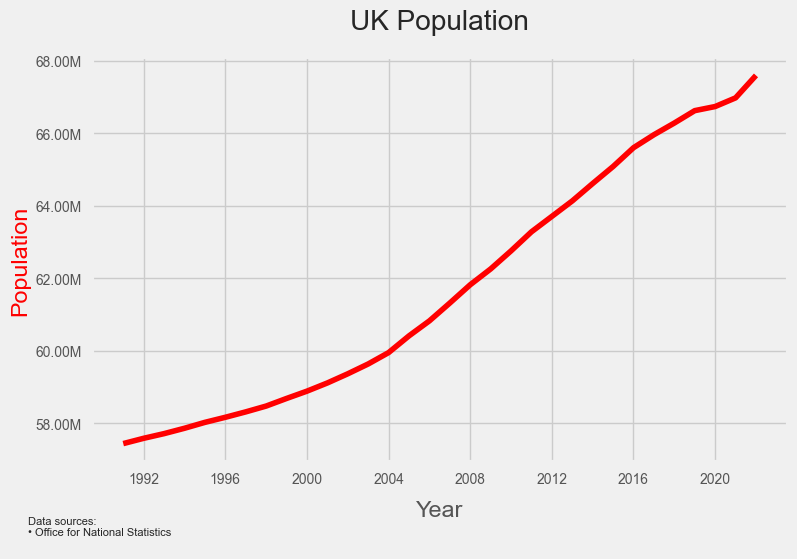

In [133]:
fig, ax = plt.subplots(figsize=(8, 5),)
p1 = sns.lineplot(data, x='year', y='population', ax=ax, color='red')

ylabels = ['{:,.2f}'.format(x) + 'M' for x in p1.get_yticks()/1000000]
p1.set_yticklabels(ylabels)
p1.set_ylabel('Population')
p1.yaxis.label.set_color('red')


p1.set_xlabel('Year', labelpad=10)

p1.set_title('UK Population', pad=20)


plt.figtext(0., -0.1, 'Data sources:\n• Office for National Statistics\n', ha='left', fontsize=8, bbox={'alpha':0., 'pad':5})

plt.savefig('fig2.png', dpi=300, bbox_inches='tight')